In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
pm_data_s2 = pd.read_csv(r"C:\Users\396760\lanl\data\ARMSAILS2_cleaned.csv")

# Convert timestamp to datetime
pm_data_s2['Time(UTC)'] = pd.to_datetime(pm_data_s2['Time(UTC)'])

# Create unique datasets for each month in dataset
monthly_data = {}
for month in range(1, 13):
    monthly_data[month] = pm_data_s2[pm_data_s2['Time(UTC)'].dt.month == month]
    #take ten minute average
    monthly_data[month] = monthly_data[month].resample('10T', on='Time(UTC)').mean()
    #rename collumn back to Time(UTC)
    monthly_data[month].reset_index(inplace=True)
    monthly_data[month] = monthly_data[month].rename(columns={'Time(UTC)': 'Time(UTC)'})
    

    

In [2]:
# Define a function to plot time series for a given month with transparency and distinct colors
def plot_monthly_data(month):
    data = monthly_data[month]
    plt.figure(figsize=(12, 6))
    plt.plot(data['Time(UTC)'], data['pm_10_ug_per_m3'], label='PM10', alpha=0.7)
    plt.plot(data['Time(UTC)'], data['pm_25_ug_per_m3'], label='PM2.5', alpha=0.7, color='red')

    plt.plot(data['Time(UTC)'], data['pm_1_ug_per_m3'], label='PM1', alpha=0.7, color = 'purple')

    plt.xlabel('Time (UTC)')
    plt.ylabel('PM Concentration (ug/m3)')
    plt.title(f'PM Concentration for Month {month}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


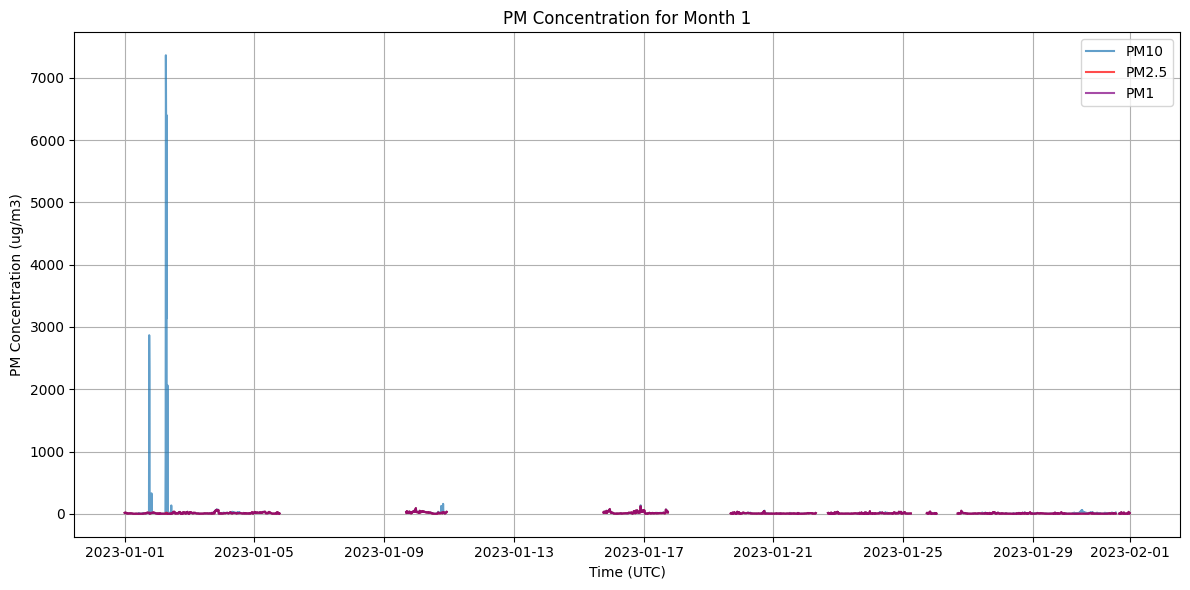

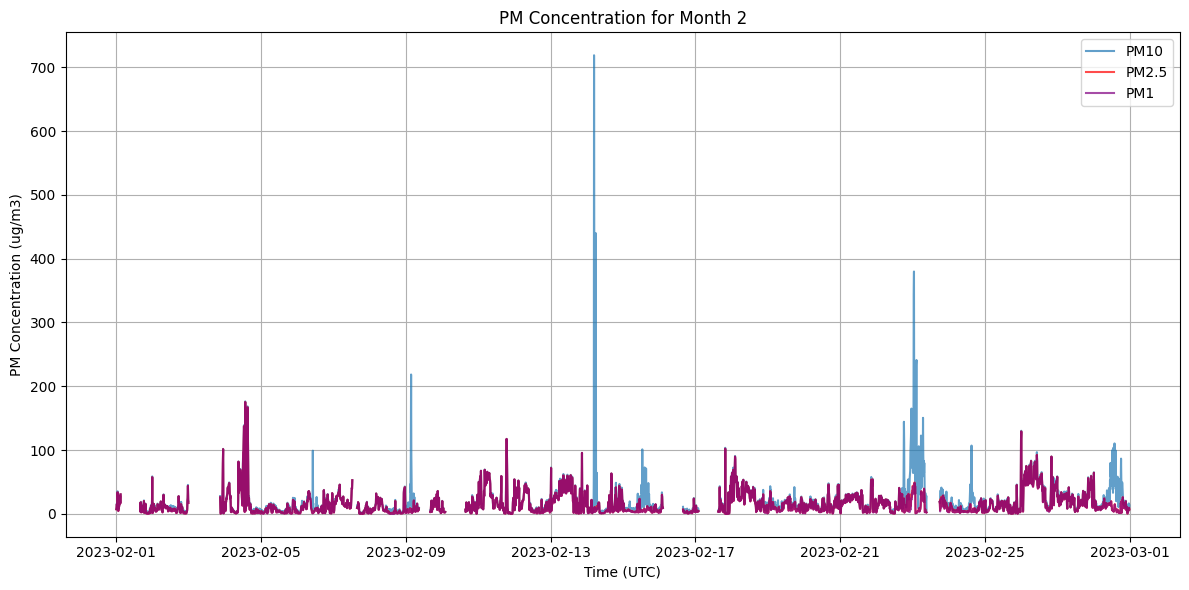

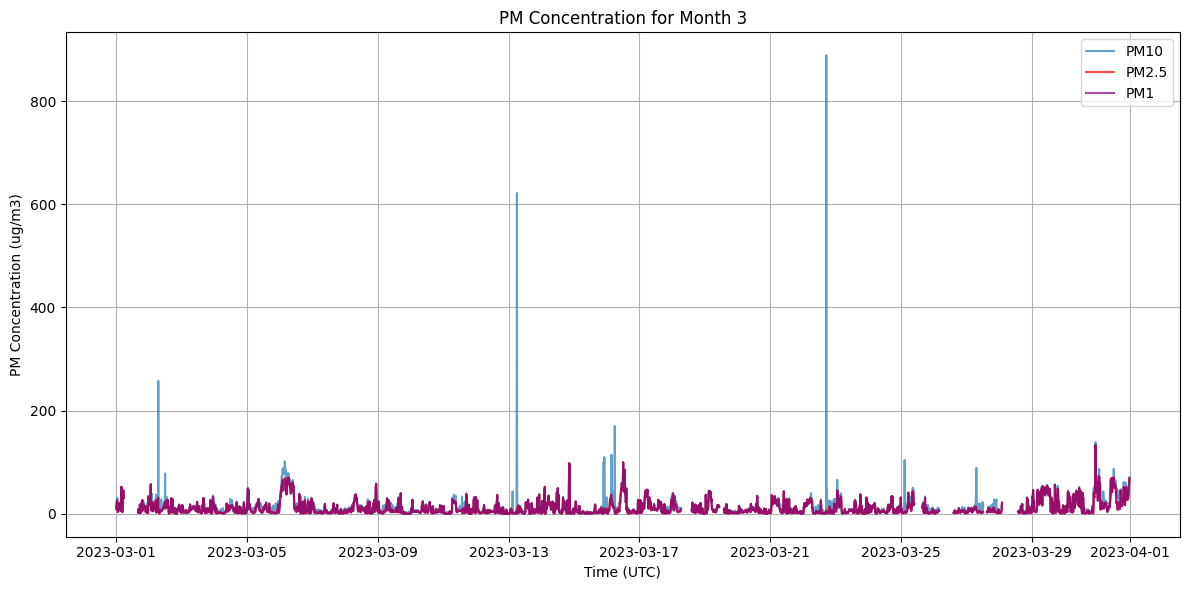

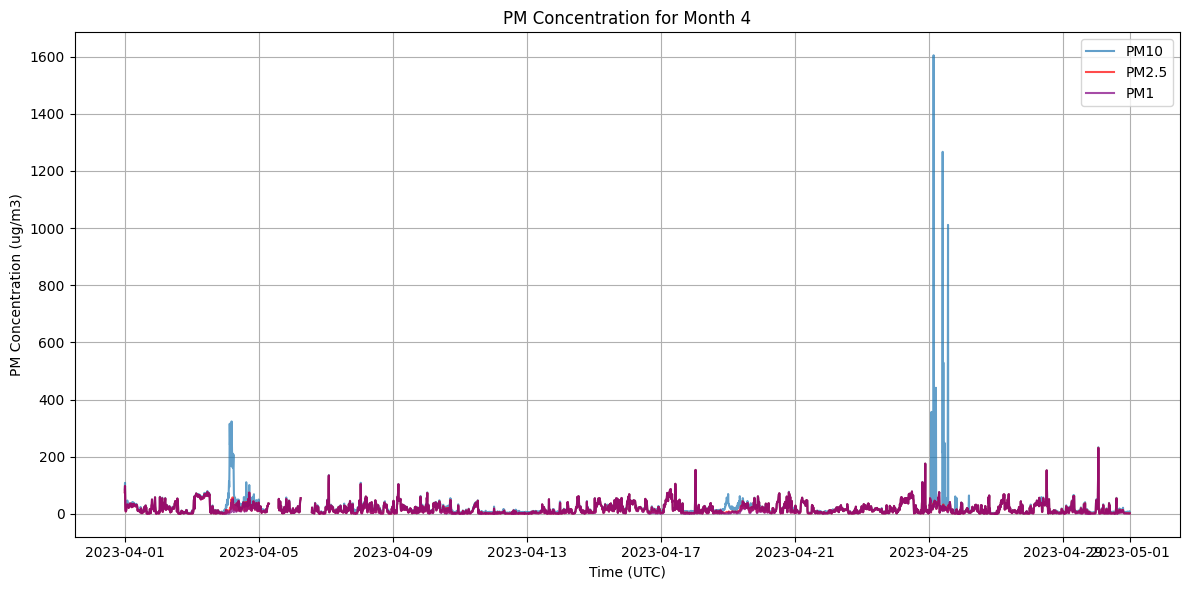

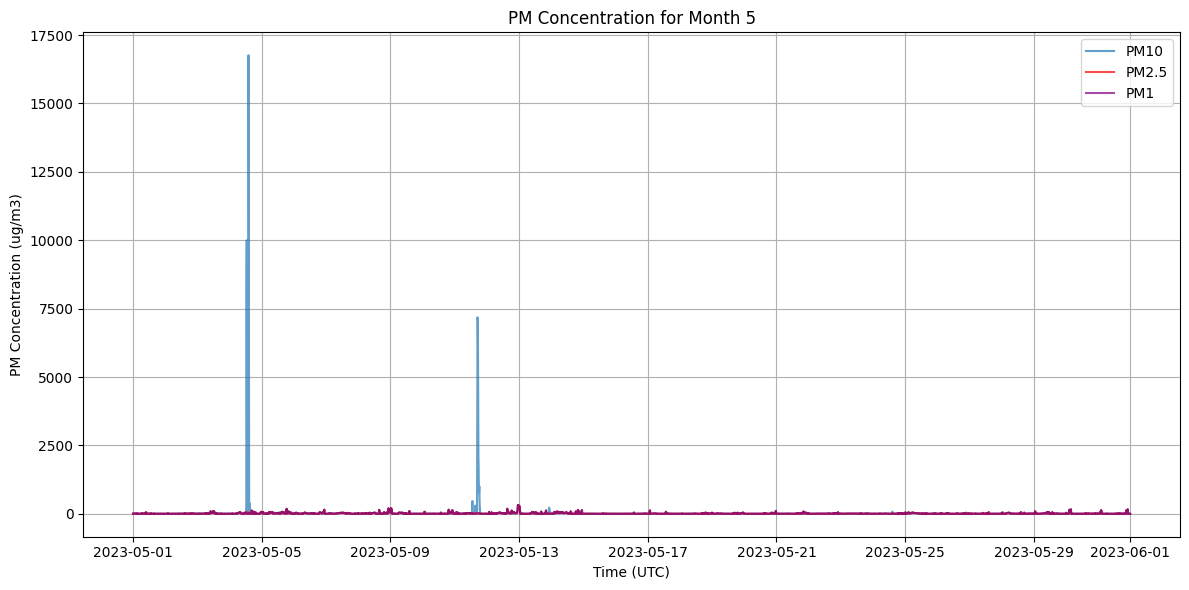

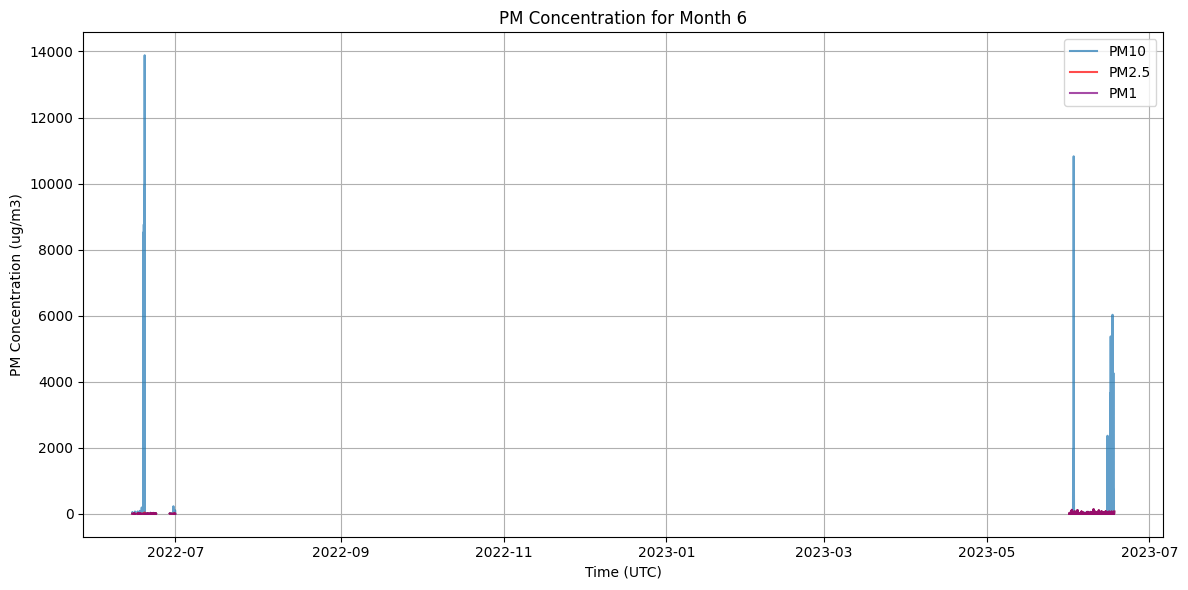

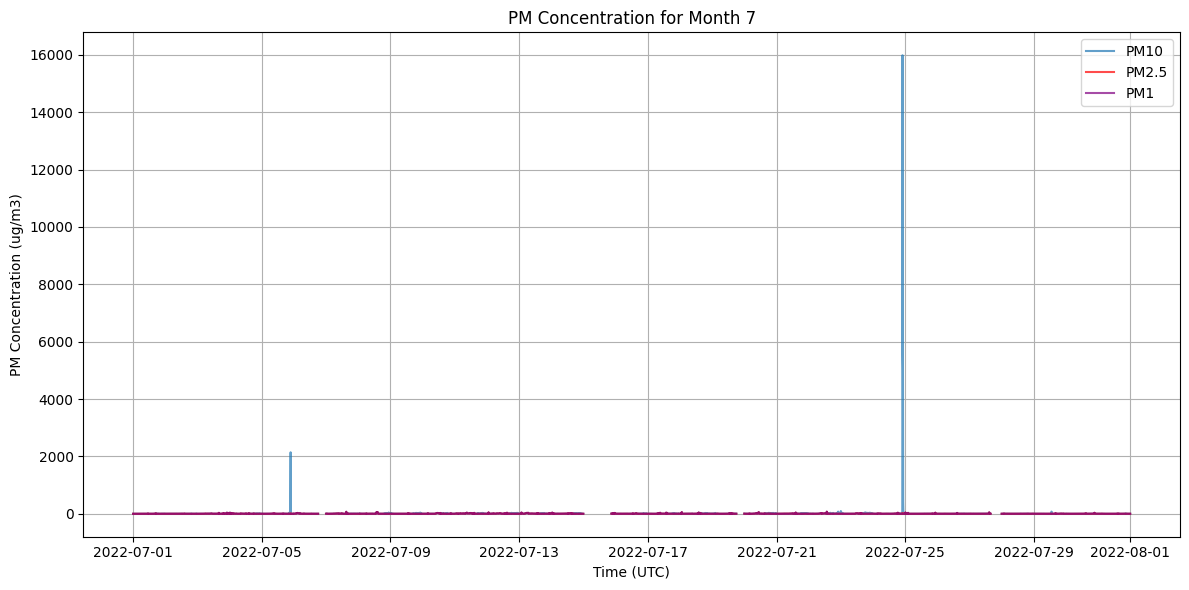

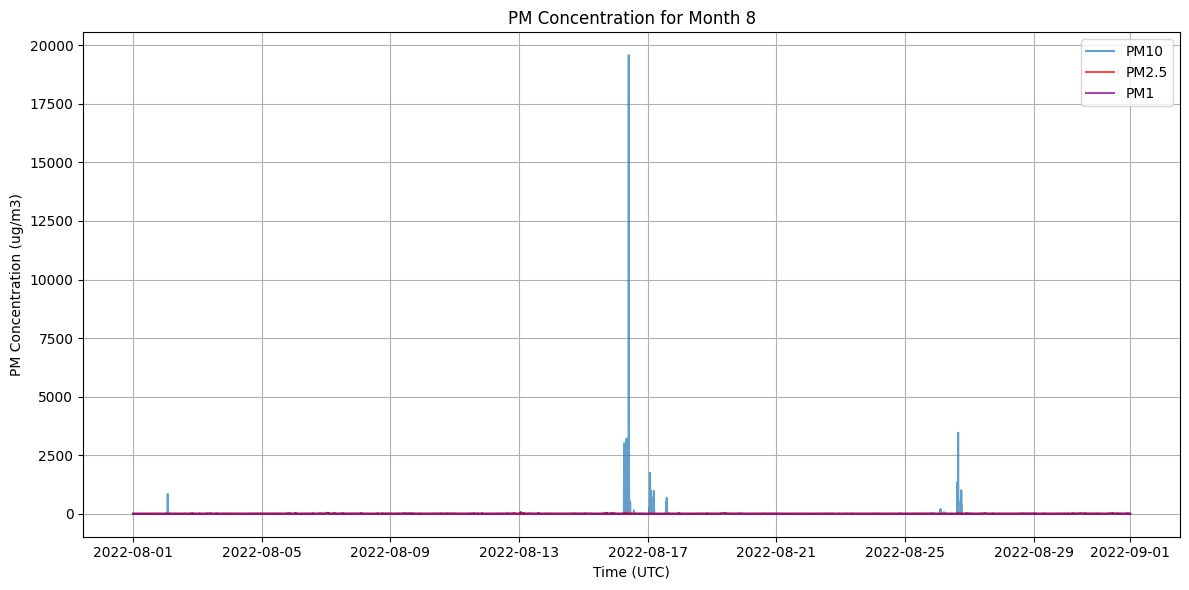

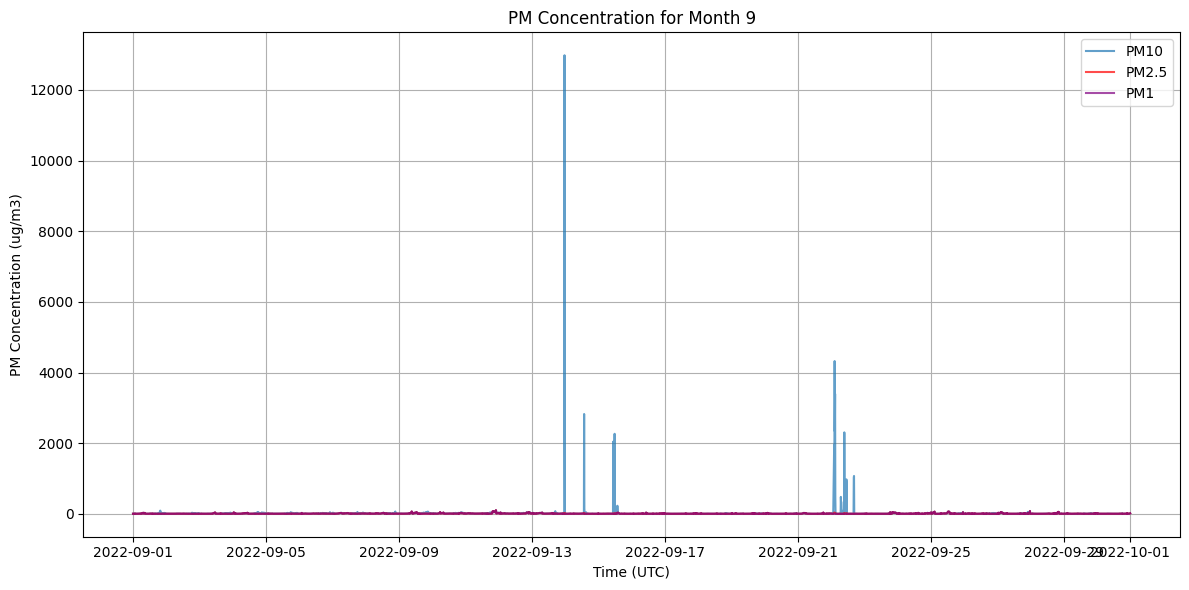

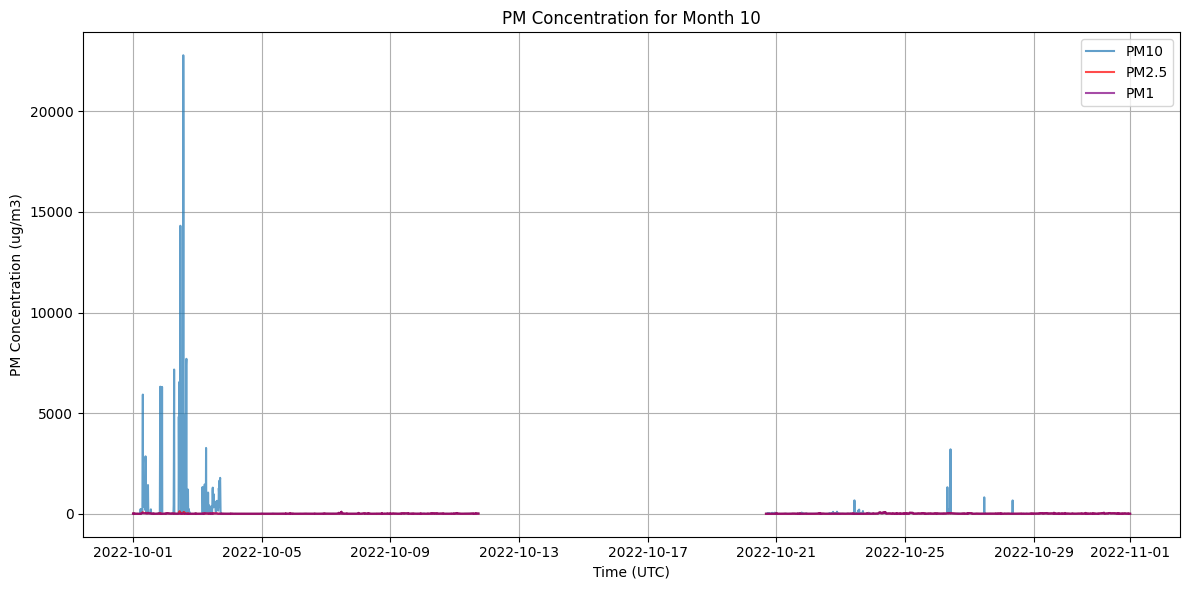

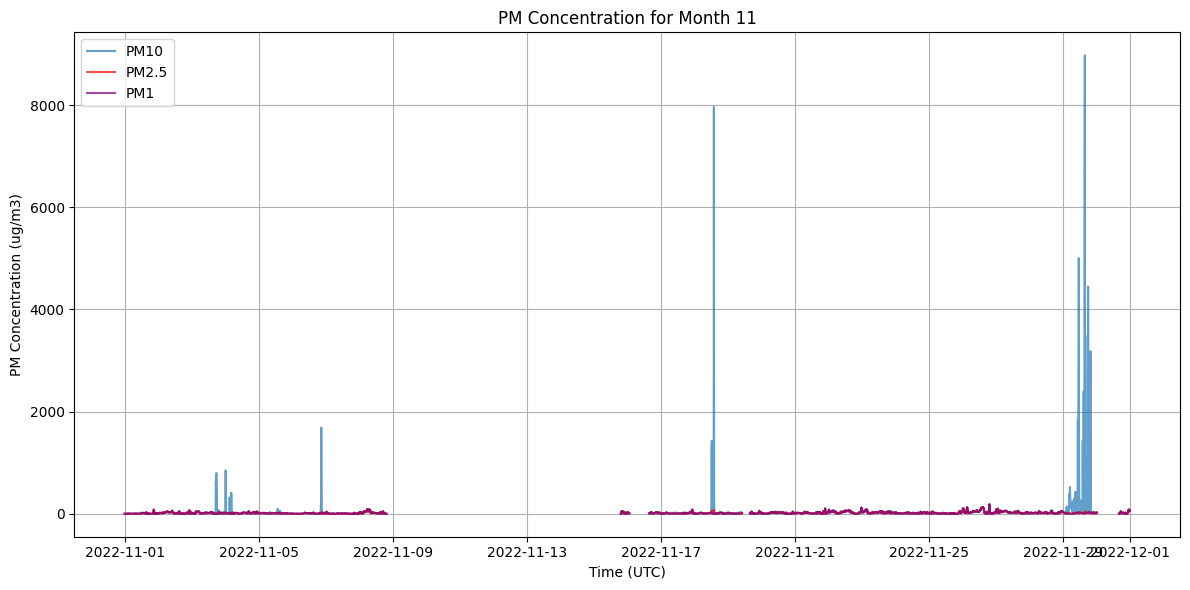

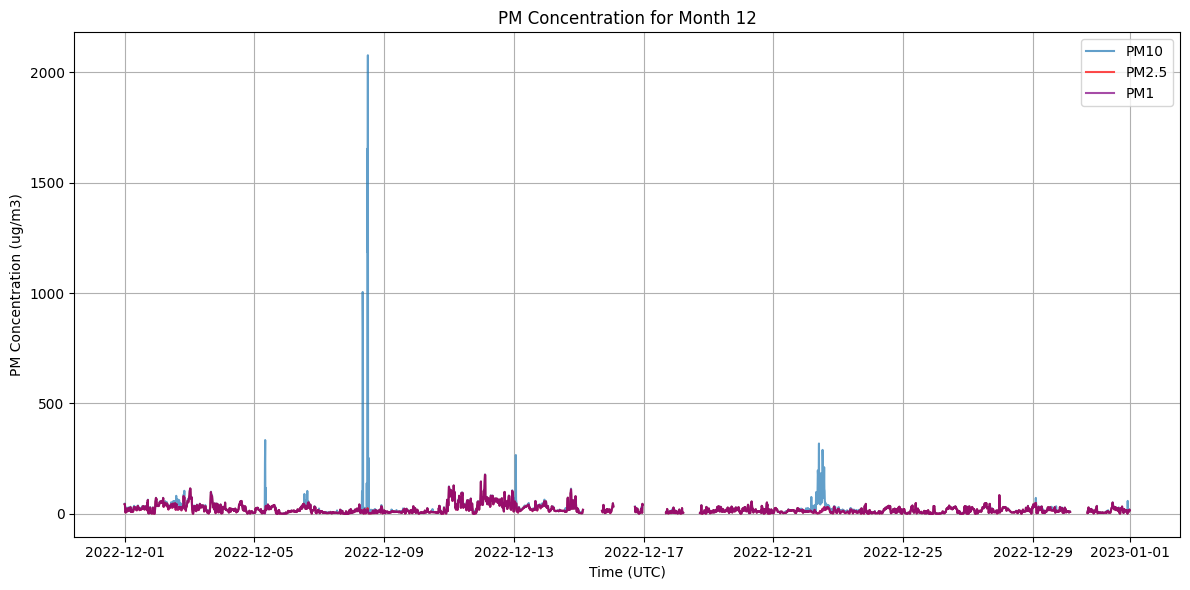

In [3]:
#plot them
for month in range(1, 13):
    plot_monthly_data(month)

